In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

## importing data

In [3]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Visualisation

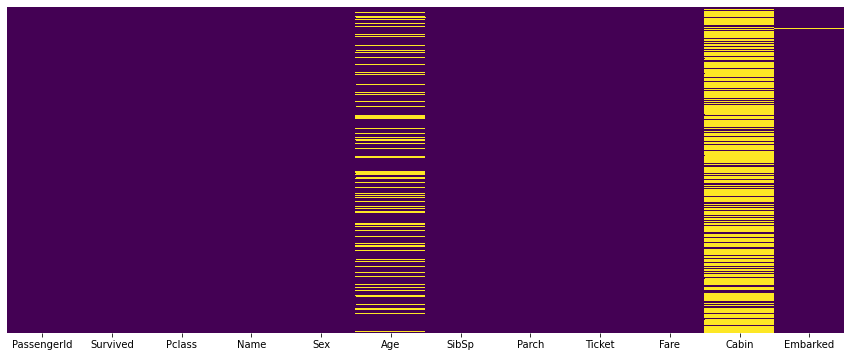

In [4]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
df.groupby(["Pclass","Sex"])["Age"].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

## Clearing Data & preprocessing

In [4]:
def process(X, y):
    pp = X[['PassengerId']].copy()
    X = X.drop('Cabin', axis=1)
    X['Embarked'] = X['Embarked'].fillna('S')
    
    X['Fare'] = (X['Fare'] - 31) / 47
    X=X.merge(pd.read_csv('config/age_fill_version.csv'))
    X["Age"]=X["Age"].fillna(X["age_fill"])
    X['family_size'] = X.SibSp + X.Parch+1
    X = pp.merge(X)
    X = X.drop(['PassengerId', 'Name', 'Ticket',"age_fill"], 1)
    X['Sex'] = (X['Sex'] == 'male').astype(int)
    X['Q'] = (X['Embarked'] == 'Q').astype(int)
    X['S'] = (X['Embarked'] == 'S').astype(int)
    X['C'] = (X['Embarked'] == 'C').astype(int)
    X = X.drop('Embarked', 1)
    
    X = X[['Pclass', 'Sex', 'Age', 'family_size', 'Fare', 'Q', 'S', "SibSp", "Parch"]]
    return X, y

In [108]:
# df_new=df.groupby(["Pclass", "Sex"])["Age"].median().rename("age_fill").reset_index().merge(df)

In [109]:
# df_new["Age"]=df_new["Age"].fillna(df_new["age_fill"])

In [111]:
# df_new=df_new.drop("age_fill",1)

In [6]:
X = df.drop(['Survived'], 1)
y = df['Survived']

In [7]:
Xp, y = process(X, y)

## using Random Forest Classifier

In [74]:
classifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [12]:
val = cross_validate(classifier, Xp, y, return_train_score=True, cv=10)


In [15]:
print("train score:", val["train_score"].mean())
print("test score:", val["test_score"].mean())


train score: 0.8736758291537076
test score: 0.8294631710362047


In [75]:
classifier.fit(Xp, y)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [76]:
y_pred = classifier.predict(process(test, None)[0])


In [77]:
test['Survived'] = y_pred
test[['PassengerId', 'Survived']].to_csv('submission_midnight.csv', index=False)

## using KNN

In [13]:
knn = KNeighborsClassifier(n_neighbors=7)


In [14]:
knn.fit(Xp, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [25]:
ks = list(range(1, 20))
trainss = []
testss = []

for k in ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    val = cross_validate(knn , Xp, y, cv=10, return_train_score=True)
    trainss.append(val['train_score'].mean())
    testss.append(val['test_score'].mean())

In [30]:
testss

[-0.13996513771593405,
 0.1614458606876606,
 0.2112113471425925,
 0.252220195877173,
 0.2697313446802182,
 0.271629408133219,
 0.27748147727402606,
 0.2746422322665135,
 0.2751718264461161,
 0.27323812765893285,
 0.2719250145616176,
 0.2624313980732985,
 0.24984902418187666,
 0.25021113345470836,
 0.2500084903873344,
 0.2399309722817101,
 0.23301719826372577,
 0.2243995278689439,
 0.22079671228849138]

In [27]:
import matplotlib.pyplot as plt

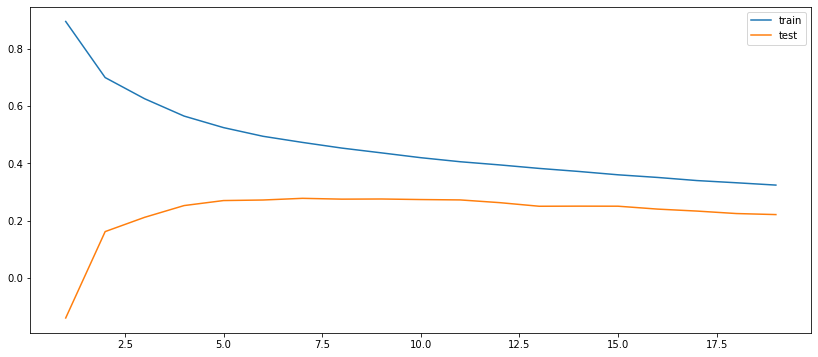

In [29]:
plt.figure(figsize=(14, 6))
plt.plot(ks, trainss, label='train')
plt.plot(ks, testss, label='test')
plt.legend()

In [15]:
y_pred = knn.predict(process(test, None)[0])


In [16]:
test['Survived'] = y_pred
test[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)

## using Logistic Regression

In [17]:
model=LogisticRegression()
model.fit(Xp,y)

c:\users\kullanıcı\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_pred=model.predict(process(test, None)[0])

In [19]:
test['Survived'] = y_pred
test[['PassengerId', 'Survived']].to_csv('submission_log.csv', index=False)

## using Naive Bayes

In [8]:
classifier_=GaussianNB()

In [11]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc=StandardScaler()
Xp=sc.fit_transform(Xp)


In [13]:
classifier_.fit(Xp,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [20]:
y_pred=classifier_.predict(Xp)

In [21]:
cv=cross_validate(classifier_, Xp, y, cv=10, return_train_score=True)

In [22]:
cv["train_score"].mean()

0.7899992528043188

In [23]:
cv["test_score"].mean()

0.7845568039950063